# Sprint 5

## Problem 1, 2, 3 and 4

In [4]:
import numpy as np
from numpy.random import *
import random

In [11]:
class ScratchSVMClassifier():

    def __init__(self, num_iter, lr, bias, Threshold): 
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.Threshold = Threshold
           
    def _SVC_hypothesis(self, X, y):
        y = y.reshape(-1,1)

        for i in range(y.shape[0]):
            temp = 0
            for j in range(y.shape[1]):
                temp += self.lambda_[j] * y[i] * y[j] * np.dot(X[i].T, X[j])
            self.lambda_[i] += self.lr * (1 - temp)
            self.lambda_[self.lambda_ <= 0] = 0
        return self.lambda_
    
    def fit(self, X, y, X_val=None, y_val=None):
        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self._SVC_hypothesis(X, y)
        
        self.index_l = []
        for j, i in enumerate(self.lambda_):
            if i > self.Threshold:
                self.index_l .append(j)
        self.lambda_sv = self.lambda_[self.index_l]
        self.X_sv = X[self.index_l]
        self.y_sv = y[self.index_l]
    
    def predict(self, X):
        self.y_pred = 0
        for i in range(self.lambda_sv.shape[0]):
             self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)  
        self.y_pred = np.where(self.y_pred > 0, 1, -1)       
        return self.y_pred

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y[y==2] = -1

In [17]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
SV = ScratchSVMClassifier(num_iter=1000, lr = 0.00000001, bias=True, Threshold=0.002)
SV.fit(X,y)

In [19]:
SV.lambda_

array([[0.01647044],
       [0.02146185],
       [0.01808876],
       [0.0163531 ],
       [0.01271574],
       [0.01938304],
       [0.01313361],
       [0.02676041],
       [0.02891602],
       [0.0115099 ],
       [0.02375881],
       [0.01587325],
       [0.01704801],
       [0.02777394],
       [0.002138  ],
       [0.00262015],
       [0.00061272],
       [0.02498519],
       [0.02335087],
       [0.02610709],
       [0.02936442],
       [0.02398136],
       [0.01385024],
       [0.02342196],
       [0.00355461],
       [0.0192039 ],
       [0.00430656],
       [0.02834581],
       [0.01566162],
       [0.01244692],
       [0.00794347],
       [0.02323392],
       [0.01369121],
       [0.0170587 ],
       [0.00056987],
       [0.01853521],
       [0.01836889],
       [0.01851431],
       [0.02831897],
       [0.02046121],
       [0.01079155],
       [0.01311708],
       [0.02093556],
       [0.00181398],
       [0.02000945],
       [0.02012561],
       [0.00631793],
       [0.003

In [21]:
y_pred = SV.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [22]:
SV = ScratchSVMClassifier(num_iter=5000, lr = 0.00001, bias=True, Threshold=0.002)
SV.fit(X_train,y_train)
y_pred = SV.predict(X_test)

In [23]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.5
1.0
0.6666666666666666
[[ 0 15]
 [ 0 15]]


## Problem 5

Let's visualize the decision are

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[: , 0], model.X_sv[:,1] , color = "Yellow")
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


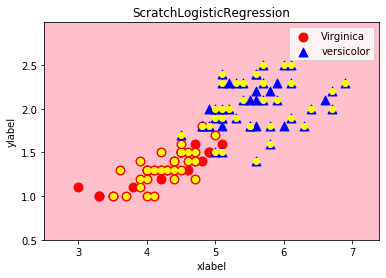

In [28]:
decision_region(X, y, SV, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=["Virginica" ,'versicolor'])

In [37]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [41]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.000001, bias=True, Threshold=0.038)
SV.fit(X,y)

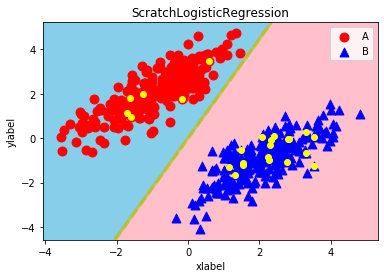

In [44]:
decision_region(X, y, SV, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=["A" ,'B'])